# Notebook | PhyNum : motifs au fond d'une piscine

## Import

In [1]:
from surface import *
from caustiques import *

import cProfile
import pstats

profiler = cProfile.Profile()



## Initialisations

In [2]:
direction = np.array([0, 0, -1])  # direction de la lumière


rayons = []
for i in range(Nx-1):
    rayons.append([])
    for j in range(Ny-1):
        rayons[i].append(Rayon(np.array([(i+di_rayon)*dx, (j+dj_rayon)*dy, 2*H]), direction, 1))


### Spectre de Phillips

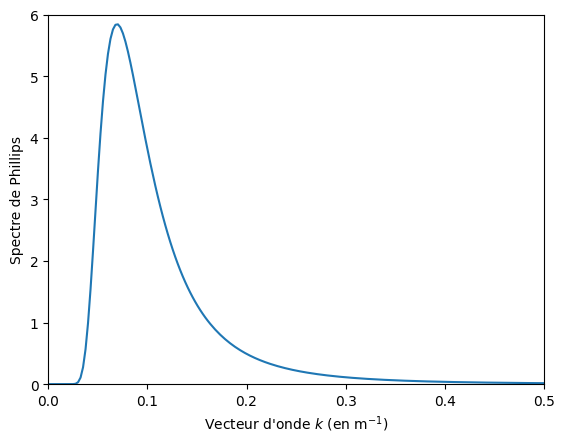

In [3]:
vals_k_spectre = np.linspace(0, 0.5, 200)
spectre = [spectre_Phillips(kx, 0) for kx in vals_k_spectre]

plt.xlim(0, 0.5)
plt.ylim(0, 6)

plt.xlabel(r"Vecteur d'onde $k$ (en m$^{-1})$")
plt.ylabel(r"Spectre de Phillips")

plt.plot(vals_k_spectre, spectre)
plt.savefig("spectre Phillips.pdf")
plt.show()


### Surface initiale

In [4]:
surface = np.zeros((Nx, Ny))
amplitude_fourier_plus = np.zeros((Nx, Ny), dtype=complex)
amplitude_fourier_moins = np.zeros((Nx, Ny), dtype=complex)

for i in range(Nx):
    for j in range(Ny):
        kx = vals_kx[i]
        ky = vals_ky[j]
        amplitude_fourier_plus[i, j] = random_amplitude_fourier_plus(kx, ky, spectre_Phillips)

        amplitude_fourier_moins[i, j] = np.conjugate(amplitude_fourier_plus[-i, -j])


update_surface(surface, 0, amplitude_fourier_plus, amplitude_fourier_moins)


## Calculs

In [5]:
profiler.enable()

trajectoires = calcul_trajectoires(rayons, surface, 0, amplitude_fourier_plus, amplitude_fourier_moins)

profiler.disable()



Calcul des trajectoires : 100%|██████████| 255/255 [00:05<00:00, 47.27it/s]


### Profiling

In [6]:
# stats = pstats.Stats(profiler).sort_stats("cumtime")
# stats.print_stats()


In [7]:
motif = calcul_motifs(rayons)

# image = motif_to_alpha(motif)
# plt.imsave(f"images/caustiques {Nx=} {H=}.png", image)

image = motif
plt.imsave(f"images/caustiques {Nx=} {H=}.png", image, cmap="gray")


## Affichage

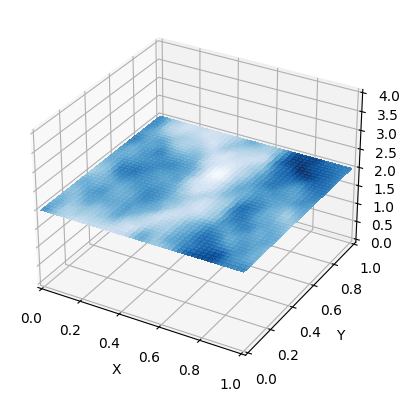

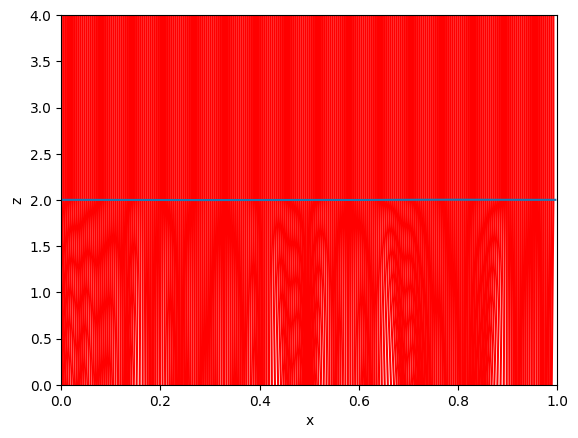

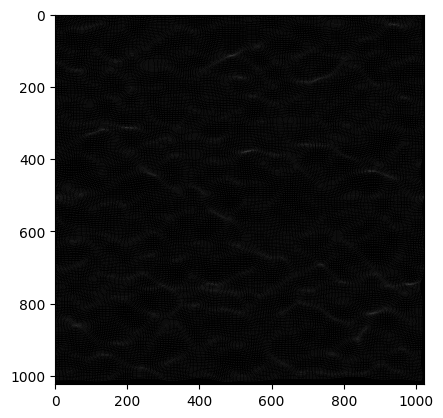

In [8]:
plot_surface(surface)
plt.show()


affiche_rayons(rayons, surface, save=True)
plt.show()


plt.imshow(motif, cmap="gray")
plt.show()


In [9]:
genere_animation(surface, amplitude_fourier_plus, rayons, save_motif=True)


frame: 100%|██████████| 20/20 [02:07<00:00,  6.38s/it]
